In [5]:
from __future__ import division, print_function, unicode_literals

# Common imports

import os

# to make this notebook's output stable across runs


# To plot pretty figures



# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:

import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url= HOUSING_URL,housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [7]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)
    

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


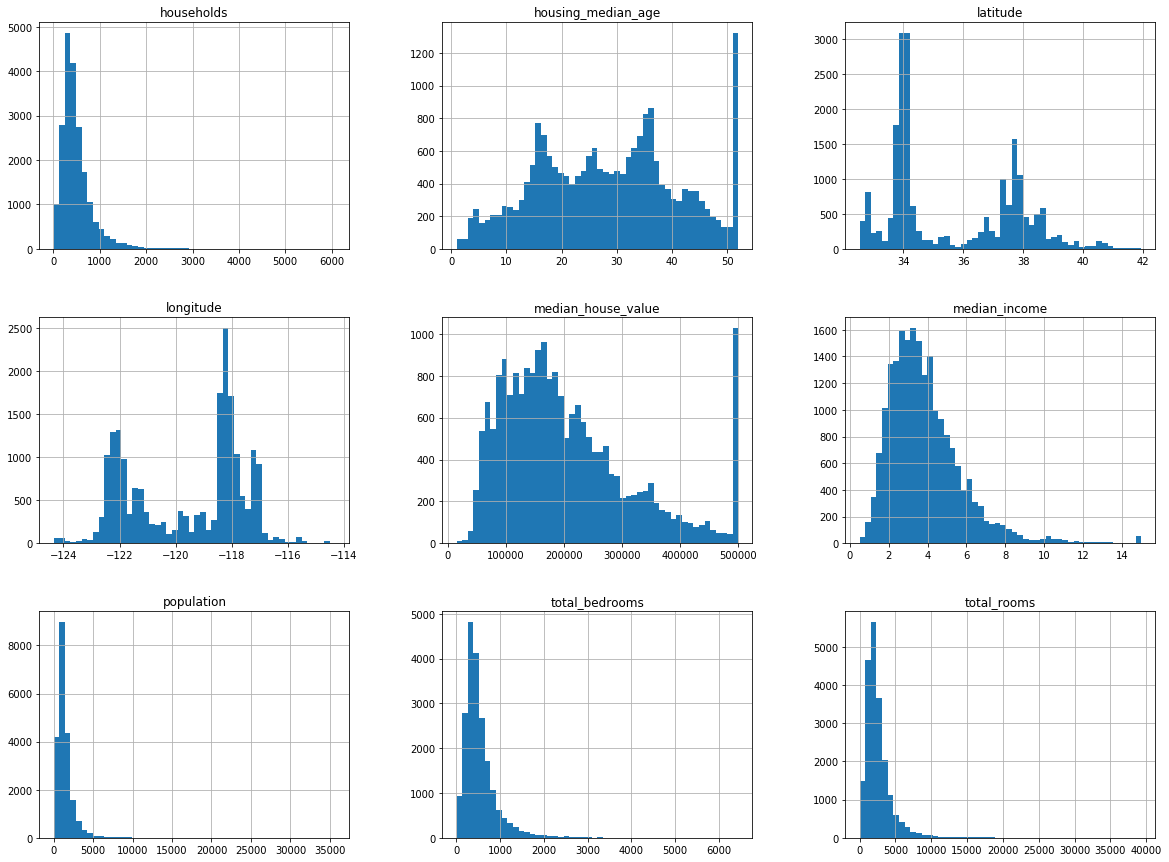

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [13]:
import numpy as np 
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set,test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +",len(test_set), "test")

16512 train + 4128 test


In [15]:
import hashlib

def test_set_check(identifier, test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 *test_ratio

def split_train_test_by_id(data,test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [16]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2,"index")

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2 ,"id")
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


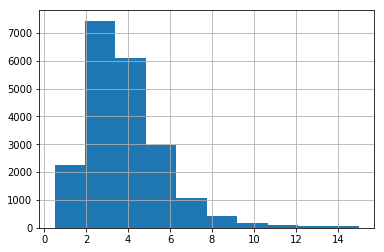

In [19]:
housing["median_income"].hist()

In [20]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace =True)
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

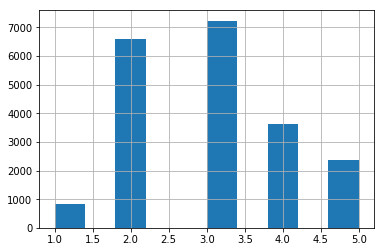

In [21]:
housing["income_cat"].hist()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [24]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [25]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)
train_set, test_set = train_test_split(housing, test_size = 0.2,random_state = 42)

compare_props = pd.DataFrame({
    "Overall" : income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"]/ compare_props["Overall"] -100
compare_props["Strat.%error"] = 100 * compare_props["Stratified"]/ compare_props["Overall"] -100


In [26]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat.%error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace =True)

In [28]:
housing = strat_train_set.copy()

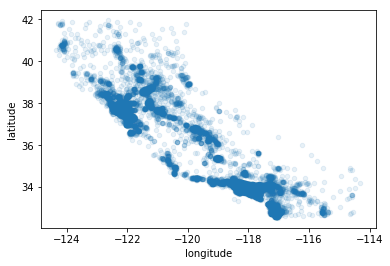

In [29]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.1)

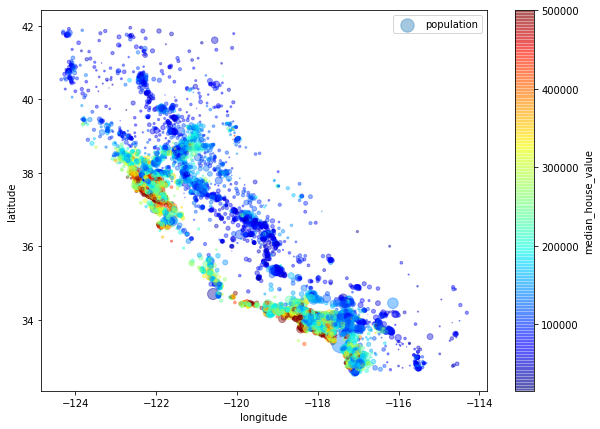

In [30]:
housing.plot(kind = "scatter", x = "longitude", y="latitude", alpha =0.4,
            s = housing["population"]/100, label = "population", figsize = (10,7),
            c = "median_house_value",cmap = plt.get_cmap("jet"),colorbar = True,
            sharex=False)
plt.legend()

Saving figure california_housing_prices_plot


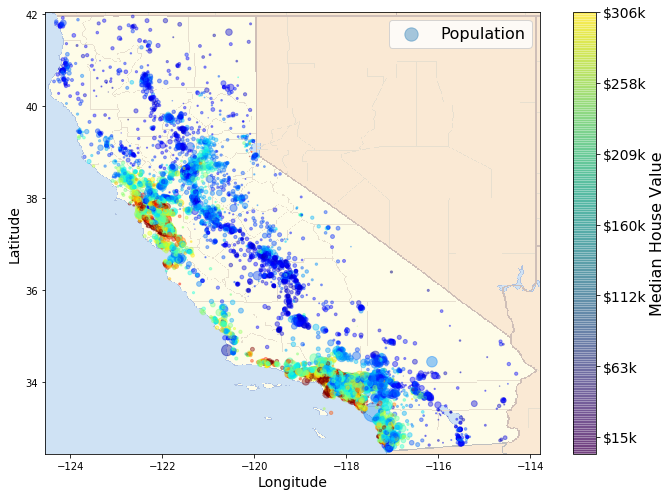

In [31]:
import matplotlib.image as mpimg
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [32]:
corr_matrix = housing.corr()

In [33]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

/home/jacobmjjo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


Saving figure scatter_matrix_plot


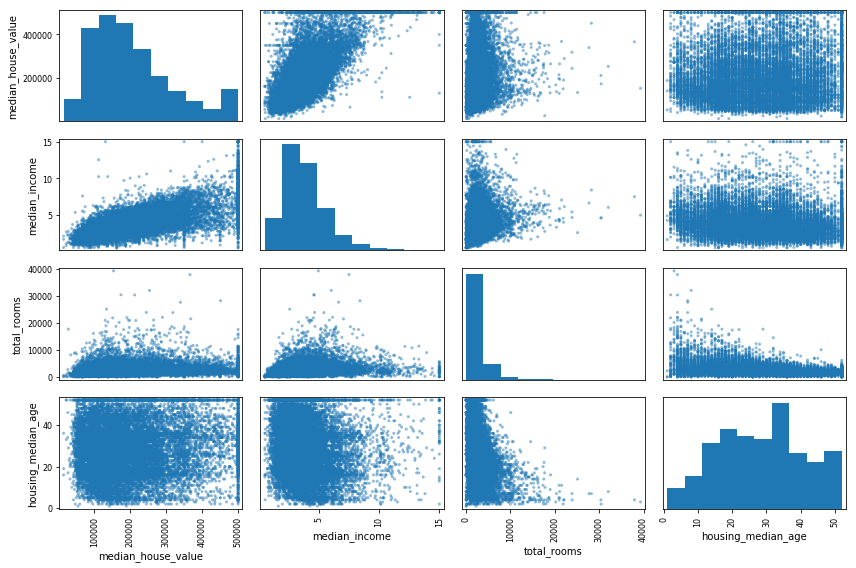

In [34]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
save_fig("scatter_matrix_plot")

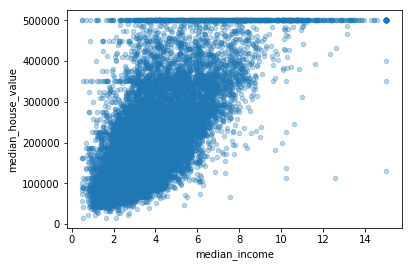

In [35]:
housing.plot(kind="scatter", x = "median_income",y="median_house_value",alpha = 0.3)

In [36]:
housing["rooms_per_household"] =  housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [37]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

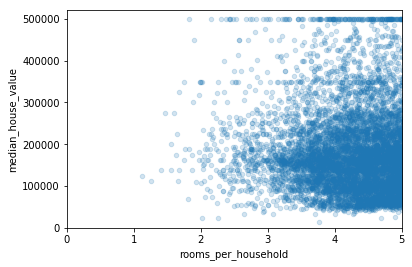

In [38]:
housing.plot(kind="scatter", x ="rooms_per_household", y="median_house_value",
            alpha=0.2)
plt.axis([0,5,0,520000])
plt.show()

In [39]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the data for Machine Learning algorithms

In [40]:
housing=strat_train_set.drop("median_house_value",axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [41]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [42]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [43]:
sample_incomplete_rows.drop(["total_bedrooms"],axis = 1) # optin 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [44]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [45]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")

In [46]:
housing_num = housing.drop("ocean_proximity",axis = 1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [47]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [48]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [49]:
X = imputer.transform(housing_num)

In [50]:
housing_tr = pd.DataFrame(X,columns = housing_num.columns,
                         index = list(housing_num.index.values))
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [51]:
imputer.strategy

'median'

In [52]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [53]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [54]:
from future_encoders import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [55]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [56]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [57]:
from future_encoders import OrdinalEncoder

In [58]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [59]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Let's create a custom transformer to add extra attrivutes:

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin

#column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X,y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household,population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)



In [61]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns = list(housing.columns)+["rooms_per_household","populaton_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,populaton_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

num_pipeline_maxmin = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('Minmax_scaler', MinMaxScaler()),
  ])

num_pipeline_stand = Pipeline([
    ('imputer', Imputer(strategy ="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_maxmin_tr = num_pipeline_maxmin.fit_transform(housing_num)
housing_num_stand_tr = num_pipeline_stand.fit_transform(housing_num)

In [63]:
housing_num_maxmin_tr

array([[0.24501992, 0.50478215, 0.7254902 , ..., 0.02482574, 0.00112831,
        0.06734832],
       [0.24103586, 0.47927736, 0.25490196, ..., 0.03465309, 0.00162207,
        0.04399646],
       [0.71215139, 0.02444208, 0.58823529, ..., 0.02198255, 0.00107325,
        0.07363329],
       ...,
       [0.79183267, 0.16471838, 0.15686275, ..., 0.03705086, 0.00164985,
        0.05140308],
       [0.6314741 , 0.1360255 , 0.58823529, ..., 0.03107846, 0.00250811,
        0.05654557],
       [0.18924303, 0.55579171, 1.        , ..., 0.02637524, 0.00104101,
        0.06608814]])

In [64]:
housing_num_stand_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

#Create a class to select numerical or categorical columns
#since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [66]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline= Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attrib_adder',CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])


cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [67]:
pd.DataFrame(cat_attribs)

,0
0,ocean_proximity


In [68]:
from sklearn.pipeline import FeatureUnion

full_pipeline_stand = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [69]:
housing_prepared = full_pipeline_stand.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [70]:
housing_prepared.shape

(16512, 16)

In [71]:
pd.DataFrame(housing_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0


# Select and train a model

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline_stand.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [74]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [75]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [76]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [77]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

In [78]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [79]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring="neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)


In [83]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [70232.0136482  66828.46839892 72444.08721003 70761.50186201
 71125.52697653 75581.29319857 70169.59286164 70055.37863456
 75370.49116773 71222.39081244]
Mean 71379.07447706361
Standard deviation: 2458.3188204349362


In [84]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean 69052.46136345083
Standard deviation: 2731.67400179835


In [85]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [86]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21941.911027380233

In [87]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51650.94405471 48920.80645498 52979.16096752 54412.74042021
 50861.29381163 56488.55699727 51866.90120786 49752.24599537
 55399.50713191 53309.74548294]
Mean 52564.19025244012
Standard deviation: 2301.873803919754


In [88]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

In [83]:
from sklearn.svm import SVR 

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators' : [3,10,30], 'max_features': [2, 4, 6, 8]},
    
    # try 12 (3x4) combinations of hyperparameters{'n_estimators' : [3,10,30], 'max_features': [2, 4, 6, 8],
    # then try 6 (2X3) combinations with boo\tstrap set as False
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}]
  
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',return_train_score=True, n_jobs = -1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [90]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [91]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [92]:
grid_cvres = grid_search.cv_results_
for mean_score, params in zip(grid_cvres["mean_test_score"], grid_cvres["params"]):
    print(np.sqrt(-mean_score),params)

63647.85444595992 {'max_features': 2, 'n_estimators': 3}
55611.50159876327 {'max_features': 2, 'n_estimators': 10}
53370.06407363344 {'max_features': 2, 'n_estimators': 30}
60959.138858487866 {'max_features': 4, 'n_estimators': 3}
52740.58416665252 {'max_features': 4, 'n_estimators': 10}
50374.14214614731 {'max_features': 4, 'n_estimators': 30}
58661.2866461823 {'max_features': 6, 'n_estimators': 3}
52009.973979776936 {'max_features': 6, 'n_estimators': 10}
50154.11777368494 {'max_features': 6, 'n_estimators': 30}
57865.36168014446 {'max_features': 8, 'n_estimators': 3}
51730.07550866553 {'max_features': 8, 'n_estimators': 10}
49694.85143334442 {'max_features': 8, 'n_estimators': 30}
62874.407393096284 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54643.49980834466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59437.89228588419 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52735.358293621044 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [93]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.098518,0.004272,0.006222,0.000938,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.850668e+09,-4.134078e+09,...,-4.051049e+09,1.431223e+08,18,-1.065637e+09,-1.104930e+09,-1.116843e+09,-1.112813e+09,-1.129842e+09,-1.106013e+09,2.173798e+07
1,0.298554,0.031780,0.016723,0.005154,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.052380e+09,-3.250767e+09,...,-3.092639e+09,1.306954e+08,11,-5.932728e+08,-5.871800e+08,-5.780873e+08,-5.713421e+08,-5.797944e+08,-5.819353e+08,7.584886e+06
2,1.263650,0.122048,0.073108,0.027483,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.692176e+09,-3.017478e+09,...,-2.848364e+09,1.604534e+08,9,-4.385337e+08,-4.394786e+08,-4.374429e+08,-4.374715e+08,-4.451903e+08,-4.396234e+08,2.883885e+06
3,0.187089,0.066321,0.008810,0.004375,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.729600e+09,-3.794768e+09,...,-3.716017e+09,1.690029e+08,16,-9.869264e+08,-1.013680e+09,-9.172986e+08,-1.035901e+09,-9.711998e+08,-9.850011e+08,4.047487e+07
4,0.516226,0.080514,0.024629,0.010086,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.667093e+09,-2.786244e+09,...,-2.781569e+09,1.278498e+08,8,-5.100563e+08,-5.158568e+08,-4.960301e+08,-5.422542e+08,-5.158794e+08,-5.160154e+08,1.498960e+07
5,1.754031,0.286856,0.046908,0.010384,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387199e+09,-2.589622e+09,...,-2.537554e+09,1.209935e+08,3,-3.840273e+08,-3.880349e+08,-3.789712e+08,-4.036920e+08,-3.846171e+08,-3.878685e+08,8.424973e+06
6,0.339409,0.087664,0.009680,0.005768,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119576e+09,-3.589855e+09,...,-3.441147e+09,1.884229e+08,14,-9.250640e+08,-8.901810e+08,-9.360639e+08,-9.025026e+08,-8.612945e+08,-9.030212e+08,2.639683e+07
7,0.940103,0.103151,0.021102,0.009404,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.553481e+09,-2.782991e+09,...,-2.705037e+09,1.464963e+08,6,-4.977158e+08,-5.044224e+08,-4.996537e+08,-4.989516e+08,-5.063617e+08,-5.014210e+08,3.357661e+06
8,1.940822,0.307983,0.041048,0.011333,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.371924e+09,-2.583696e+09,...,-2.515436e+09,1.283580e+08,2,-3.833222e+08,-3.801143e+08,-3.805596e+08,-3.856159e+08,-3.904866e+08,-3.840197e+08,3.796810e+06
9,0.293366,0.039603,0.006488,0.002097,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.351347e+09,-3.352606e+09,...,-3.348400e+09,1.226683e+08,13,-9.225948e+08,-8.561612e+08,-8.596460e+08,-8.893698e+08,-9.146734e+08,-8.884890e+08,2.730057e+07


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

# RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = { 
              'n_estimators': randint(low=1, high=200),
              'max_features': randint(low=1, high=8),

    }
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42,n_jobs = -1)
rnd_search.fit(housing_prepared, housing_labels)

In [90]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49147.15241724505 {'max_features': 7, 'n_estimators': 180}
51396.876896929905 {'max_features': 5, 'n_estimators': 15}
50797.05737322649 {'max_features': 3, 'n_estimators': 72}
50840.744513982805 {'max_features': 5, 'n_estimators': 21}
49276.17530332962 {'max_features': 7, 'n_estimators': 122}
50775.46331678437 {'max_features': 3, 'n_estimators': 75}
50681.383924974936 {'max_features': 3, 'n_estimators': 88}
49612.152530468346 {'max_features': 5, 'n_estimators': 100}
50473.01751424941 {'max_features': 3, 'n_estimators': 150}
64458.25385034794 {'max_features': 5, 'n_estimators': 2}


In [91]:
feature_importances_rnd = rnd_search.best_estimator_.feature_importances_
feature_importances_rnd

array([7.24699052e-02, 6.38080322e-02, 4.27504395e-02, 1.65343807e-02,
       1.56100762e-02, 1.60929106e-02, 1.52149598e-02, 3.45178404e-01,
       5.74445360e-02, 1.08468449e-01, 7.05907498e-02, 8.77441303e-03,
       1.60563229e-01, 6.10403994e-05, 3.08961266e-03, 3.34886200e-03])

In [126]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances_rnd, attributes), reverse=True)

[(0.34517840438011976, 'median_income'),
 (0.16056322891587674, 'INLAND'),
 (0.10846844860879656, 'pop_per_hhold'),
 (0.0724699051555905, 'longitude'),
 (0.07059074984842854, 'bedrooms_per_room'),
 (0.06380803224443843, 'latitude'),
 (0.05744453597184108, 'rooms_per_hhold'),
 (0.042750439456624885, 'housing_median_age'),
 (0.016534380739553062, 'total_rooms'),
 (0.0160929105971958, 'population'),
 (0.015610076150868495, 'total_bedrooms'),
 (0.015214959838627945, 'households'),
 (0.008774413032023278, '<1H OCEAN'),
 (0.003348861998751044, 'NEAR OCEAN'),
 (0.0030896126618977574, 'NEAR BAY'),
 (6.104039936629336e-05, 'ISLAND')]

In [93]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]


In [96]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline_stand.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [99]:
final_rmse

46921.659310064526

# Extra material

## A full pipeline with both with both preparation and prediction

In [100]:
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline_stand),
    ("linear", LinearRegression()),
  
  ])
full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)


array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

## Model persistence using joblib

In [101]:
my_model = full_pipeline_with_predictor

In [102]:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributionjs for `RandomizedSearchCV`

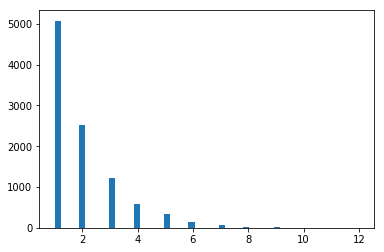

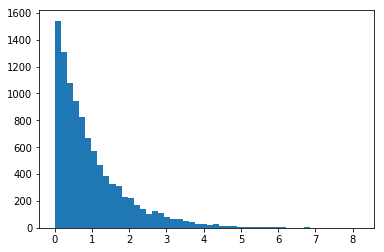

In [103]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal


# see https://docs.scipy.org/doc/scipy-0.19.0/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C' : reciprocal(20,200000),
    'gamma': expon(scale=1.0),
     }


svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=-1, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV] C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf .....
[CV] C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf .....
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  33.0s
[CV] C

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min


[CV]  C=432.37884813148855, gamma=0.15416196746656105, kernel=linear, total=  29.6s
[CV] C=113564.03940586245, gamma=0.0007790692366582295, kernel=rbf ...
[CV]  C=432.37884813148855, gamma=0.15416196746656105, kernel=linear, total=  30.6s
[CV] C=108.30488238805073, gamma=0.3627537294604771, kernel=rbf ......
[CV]  C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf, total=  37.5s
[CV] C=108.30488238805073, gamma=0.3627537294604771, kernel=rbf ......
[CV]  C=24.17508294611391, gamma=3.503557475158312, kernel=rbf, total=  33.3s
[CV] C=108.30488238805073, gamma=0.3627537294604771, kernel=rbf ......
[CV]  C=24.17508294611391, gamma=3.503557475158312, kernel=rbf, total=  31.3s
[CV] C=108.30488238805073, gamma=0.3627537294604771, kernel=rbf ......
[CV]  C=24.17508294611391, gamma=3.503557475158312, kernel=rbf, total=  31.8s
[CV] C=108.30488238805073, gamma=0.3627537294604771, kernel=rbf ......
[CV]  C=24.17508294611391, gamma=3.503557475158312, kernel=rbf, total=  34.3s
[CV] C=21.344

[CV]  C=34246.75194632794, gamma=0.3632878599687583, kernel=linear, total=  25.7s
[CV] C=61.54360542501371, gamma=0.6835472281341501, kernel=linear ....
[CV]  C=34246.75194632794, gamma=0.3632878599687583, kernel=linear, total=  26.1s
[CV] C=61.54360542501371, gamma=0.6835472281341501, kernel=linear ....
[CV]  C=34246.75194632794, gamma=0.3632878599687583, kernel=linear, total=  26.2s
[CV] C=98.73897389920914, gamma=0.4960365360493639, kernel=rbf .......
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total= 1.4min
[CV] C=98.73897389920914, gamma=0.4960365360493639, kernel=rbf .......
[CV]  C=61.54360542501371, gamma=0.6835472281341501, kernel=linear, total=  15.4s
[CV] C=98.73897389920914, gamma=0.4960365360493639, kernel=rbf .......
[CV]  C=167.7278956080511, gamma=0.2757870542258224, kernel=rbf, total=  18.6s
[CV] C=98.73897389920914, gamma=0.4960365360493639, kernel=rbf .......
[CV]  C=167.7278956080511, gamma=0.2757870542258224, kernel=rbf, total=  18.6s
[CV] C

[CV]  C=2963.564121207815, gamma=0.15189814782062885, kernel=linear, total=  24.6s
[CV] C=91.64267381686706, gamma=0.01575994483585621, kernel=linear ...
[CV]  C=4446.667521184072, gamma=3.3597284456608496, kernel=rbf, total=  26.6s
[CV] C=91.64267381686706, gamma=0.01575994483585621, kernel=linear ...
[CV]  C=2963.564121207815, gamma=0.15189814782062885, kernel=linear, total=  23.5s
[CV] C=91.64267381686706, gamma=0.01575994483585621, kernel=linear ...
[CV]  C=2963.564121207815, gamma=0.15189814782062885, kernel=linear, total=  26.5s
[CV] C=24547.601975705915, gamma=0.22153944050588595, kernel=rbf .....
[CV]  C=91.64267381686706, gamma=0.01575994483585621, kernel=linear, total=  20.0s
[CV] C=24547.601975705915, gamma=0.22153944050588595, kernel=rbf .....
[CV]  C=91.64267381686706, gamma=0.01575994483585621, kernel=linear, total=  26.6s
[CV] C=24547.601975705915, gamma=0.22153944050588595, kernel=rbf .....
[CV]  C=2963.564121207815, gamma=0.15189814782062885, kernel=linear, total=  28.

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  9.9min


[CV]  C=24547.601975705915, gamma=0.22153944050588595, kernel=rbf, total=  27.7s
[CV] C=16483.850529752886, gamma=1.4752145260435134, kernel=linear ...
[CV]  C=22.76927941060928, gamma=0.22169760231351215, kernel=rbf, total=  27.7s
[CV] C=16483.850529752886, gamma=1.4752145260435134, kernel=linear ...
[CV]  C=22.76927941060928, gamma=0.22169760231351215, kernel=rbf, total=  28.1s
[CV] C=16483.850529752886, gamma=1.4752145260435134, kernel=linear ...
[CV]  C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf, total= 3.9min
[CV] C=16483.850529752886, gamma=1.4752145260435134, kernel=linear ...
[CV]  C=16483.850529752886, gamma=1.4752145260435134, kernel=linear, total=  32.5s
[CV]  C=22.76927941060928, gamma=0.22169760231351215, kernel=rbf, total=  31.6s
[CV] C=101445.66881340064, gamma=1.052904084582266, kernel=rbf .......
[CV] C=101445.66881340064, gamma=1.052904084582266, kernel=rbf .......
[CV]  C=16483.850529752886, gamma=1.4752145260435134, kernel=linear, total=  33.5s
[CV] C=

[CV] C=3582.0552780489566, gamma=1.1891370222133257, kernel=linear ...
[CV]  C=55.53838911232773, gamma=0.578634378499143, kernel=linear, total=  25.4s
[CV] C=3582.0552780489566, gamma=1.1891370222133257, kernel=linear ...
[CV]  C=1888.9148509967113, gamma=0.739678838777267, kernel=linear, total=  29.4s
[CV] C=3582.0552780489566, gamma=1.1891370222133257, kernel=linear ...
[CV]  C=55.53838911232773, gamma=0.578634378499143, kernel=linear, total=  26.0s
[CV] C=3582.0552780489566, gamma=1.1891370222133257, kernel=linear ...
[CV]  C=55.53838911232773, gamma=0.578634378499143, kernel=linear, total=  29.3s
[CV] C=3582.0552780489566, gamma=1.1891370222133257, kernel=linear ...
[CV]  C=55.53838911232773, gamma=0.578634378499143, kernel=linear, total=  33.0s
[CV] C=198.7004781812736, gamma=0.5282819748826726, kernel=linear ....
[CV]  C=55.53838911232773, gamma=0.578634378499143, kernel=linear, total=  30.4s
[CV] C=198.7004781812736, gamma=0.5282819748826726, kernel=linear ....
[CV]  C=3582.055

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 17.3min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7dbcef3198>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7dbd90f4a8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

# Exercise 


## 1. 
Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="rbf"  (with various values for the C hyperparameter).Don't worry about What hyperparameters mean for now.
How does the best SVR predictor perform?

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel' : ['linear'], 'C': [10,30,100,300,1000,3000,10000]},
    {'kernel' : ['rbf'], 'C': [1,3,10,30,100,300,1000],
      'gamma' : [0.01, 0.03,0.1,0.3,1.0,3.0]}
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', verbose=2, n_jobs=10)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=10, kernel=linear .............................................
[CV] C=30, kernel=linear .............................................
[CV] C=30, kernel=linear .............................................
[CV] C=10, kernel=linear .............................................
[CV] C=30, kernel=linear .............................................
[CV] C=10, kernel=linear .............................................
[CV] C=30, kernel=linear .............................................
[CV] C=10, kernel=linear .............................................
[CV] C=10, kernel=linear .............................................
[CV] C=30, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=  13.5s
[CV] C=100, kernel=linear ............................................
[CV] .............................. C=10, kernel=linear, total=  20.0s
[CV] C=100, ker

[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   59.9s


[CV] ............................ C=1000, kernel=linear, total=  16.6s
[CV] C=10000, kernel=linear ..........................................
[CV] ............................ C=1000, kernel=linear, total=  18.7s
[CV] C=10000, kernel=linear ..........................................
[CV] ............................ C=1000, kernel=linear, total=  18.9s
[CV] C=10000, kernel=linear ..........................................
[CV] ............................ C=3000, kernel=linear, total=  19.7s
[CV] C=10000, kernel=linear ..........................................
[CV] ............................ C=1000, kernel=linear, total=  21.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ............................ C=3000, kernel=linear, total=  23.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ............................ C=3000, kernel=linear, total=  21.7s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ....................... C=3, gamma=0.1, kernel=rbf, total=  22.4s
[CV] C=3, gamma=1.0, kernel=rbf ......................................
[CV] ....................... C=3, gamma=0.3, kernel=rbf, total=  19.3s
[CV] C=3, gamma=3.0, kernel=rbf ......................................
[CV] ....................... C=3, gamma=0.3, kernel=rbf, total=  24.2s
[CV] C=3, gamma=3.0, kernel=rbf ......................................
[CV] ....................... C=3, gamma=0.3, kernel=rbf, total=  21.2s
[CV] C=3, gamma=3.0, kernel=rbf ......................................
[CV] ....................... C=3, gamma=0.3, kernel=rbf, total=  19.9s
[CV] C=3, gamma=3.0, kernel=rbf ......................................
[CV] ....................... C=3, gamma=0.3, kernel=rbf, total=  22.2s
[CV] C=3, gamma=3.0, kernel=rbf ......................................
[CV] ....................... C=3, gamma=1.0, kernel=rbf, total=  18.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] ...................... C=30, gamma=0.1, kernel=rbf, total=  20.8s
[CV] C=30, gamma=1.0, kernel=rbf .....................................
[CV] ...................... C=30, gamma=0.1, kernel=rbf, total=  19.4s
[CV] C=30, gamma=1.0, kernel=rbf .....................................
[CV] ...................... C=30, gamma=0.1, kernel=rbf, total=  21.9s
[CV] C=30, gamma=1.0, kernel=rbf .....................................
[CV] ...................... C=30, gamma=0.3, kernel=rbf, total=  21.4s
[CV] C=30, gamma=3.0, kernel=rbf .....................................
[CV] ...................... C=30, gamma=0.3, kernel=rbf, total=  18.2s
[CV] C=30, gamma=3.0, kernel=rbf .....................................


[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  7.3min


[CV] ...................... C=30, gamma=1.0, kernel=rbf, total=  16.3s
[CV] C=30, gamma=3.0, kernel=rbf .....................................
[CV] ...................... C=30, gamma=0.3, kernel=rbf, total=  21.7s
[CV] C=30, gamma=3.0, kernel=rbf .....................................
[CV] ...................... C=30, gamma=0.3, kernel=rbf, total=  21.8s
[CV] C=30, gamma=3.0, kernel=rbf .....................................
[CV] ...................... C=30, gamma=0.3, kernel=rbf, total=  22.5s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ...................... C=30, gamma=1.0, kernel=rbf, total=  19.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ...................... C=30, gamma=1.0, kernel=rbf, total=  20.5s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ...................... C=30, gamma=1.0, kernel=rbf, total=  20.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ..................... C=300, gamma=0.3, kernel=rbf, total=  24.4s
[CV] C=300, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=300, gamma=0.3, kernel=rbf, total=  22.5s
[CV] C=300, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=300, gamma=0.3, kernel=rbf, total=  24.6s
[CV] C=300, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=300, gamma=0.3, kernel=rbf, total=  23.8s
[CV] C=300, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=300, gamma=0.3, kernel=rbf, total=  24.8s
[CV] C=300, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=300, gamma=1.0, kernel=rbf, total=  23.9s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ..................... C=300, gamma=1.0, kernel=rbf, total=  24.6s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=10)]: Done 245 out of 245 | elapsed: 12.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=10,
       param_grid=[{'kernel': ['linear'], 'C': [10, 30, 100, 300, 1000, 3000, 10000]}, {'kernel': ['rbf'], 'C': [1, 3, 10, 30, 100, 300, 1000], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [106]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70374.82796803635

## 2.
Try replacing `GridSearchCV` with `RandomizedSearchCV`.

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy-0.19.0/reference/stats.html
# for 'expon() and 'reciprocal()' documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
    'kernel' : ['linear', 'rbf'],
    'C' : reciprocal(20,2000000),
    'gamma' : expon(scale=1.0),
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distribs, cv=5,scoring = "neg_mean_squared_error",
                                verbose=2, n_jobs = 10, random_state = 42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1491.868657145309, gamma=3.010121430917521, kernel=linear .....
[CV] C=1491.868657145309, gamma=3.010121430917521, kernel=linear .....
[CV] C=158301.48795312425, gamma=0.9084469696321253, kernel=rbf ......
[CV] C=1491.868657145309, gamma=3.010121430917521, kernel=linear .....
[CV] C=158301.48795312425, gamma=0.9084469696321253, kernel=rbf ......
[CV] C=1491.868657145309, gamma=3.010121430917521, kernel=linear .....
[CV] C=1491.868657145309, gamma=3.010121430917521, kernel=linear .....
[CV] C=158301.48795312425, gamma=0.9084469696321253, kernel=rbf ......
[CV] C=158301.48795312425, gamma=0.9084469696321253, kernel=rbf ......
[CV] C=158301.48795312425, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=1491.868657145309, gamma=3.010121430917521, kernel=linear, total=   8.4s
[CV] C=120.50431472407715, gamma=0.059838768608680676, kernel=rbf ....
[CV]  C=1491.868657145309, gamma=3.010121430917521, kernel=linear, total=  16

[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  1.6min


[CV]  C=985810.7296483348, gamma=0.0007790692366582295, kernel=rbf, total=  17.2s
[CV] C=165.21616798159204, gamma=0.3627537294604771, kernel=rbf ......
[CV]  C=985810.7296483348, gamma=0.0007790692366582295, kernel=rbf, total=  18.5s
[CV] C=165.21616798159204, gamma=0.3627537294604771, kernel=rbf ......
[CV]  C=985810.7296483348, gamma=0.0007790692366582295, kernel=rbf, total=  17.3s
[CV] C=165.21616798159204, gamma=0.3627537294604771, kernel=rbf ......
[CV]  C=985810.7296483348, gamma=0.0007790692366582295, kernel=rbf, total=  15.5s
[CV] C=165.21616798159204, gamma=0.3627537294604771, kernel=rbf ......
[CV]  C=158301.48795312425, gamma=0.9084469696321253, kernel=rbf, total= 1.8min
[CV] C=21.695093280261474, gamma=0.023332523598323388, kernel=linear .
[CV]  C=165.21616798159204, gamma=0.3627537294604771, kernel=rbf, total=  16.7s
[CV] C=21.695093280261474, gamma=0.023332523598323388, kernel=linear .
[CV]  C=158301.48795312425, gamma=0.9084469696321253, kernel=rbf, total= 2.0min
[CV] C

[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  7.1min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=10,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7dbcf7d208>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7dbcf7d828>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [108]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

55168.874496185934

In [109]:
rnd_search.best_params_

{'C': 1478453.2281032088, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

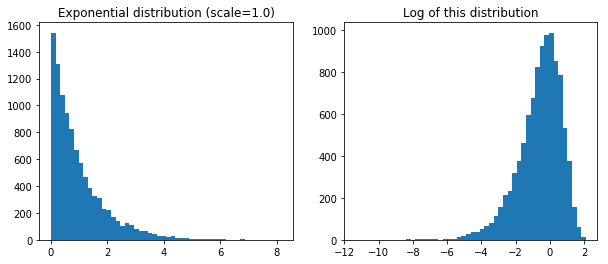

In [110]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42 )
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples),bins=50)
plt.show()

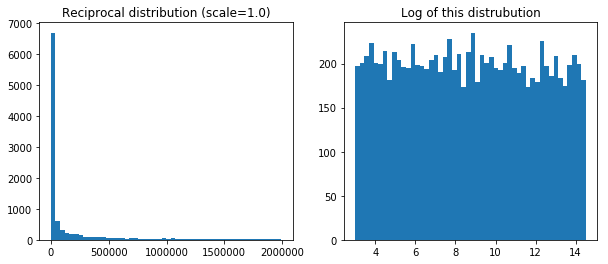

In [111]:
reciprocal_distrib = reciprocal(20,2000000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize= (10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distrubution")
plt.hist(np.log(samples), bins=50)
plt.show()

## 3.
Try adding a gransformer in the preparation pipeline to select only the most important attributes.

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self,X,y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [127]:
k = 5

In [128]:
top_k_feature_indices = indices_of_top_k(feature_importances_rnd, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12])

In [131]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

In [132]:
pd.DataFrame(attributes)

,0
0,longitude
1,latitude
2,housing_median_age
3,total_rooms
4,total_bedrooms
5,population
6,households
7,median_income
8,rooms_per_hhold
9,pop_per_hhold


In [134]:
sorted(zip(feature_importances_rnd, attributes), reverse=True)[:k]

[(0.34517840438011976, 'median_income'),
 (0.16056322891587674, 'INLAND'),
 (0.10846844860879656, 'pop_per_hhold'),
 (0.0724699051555905, 'longitude'),
 (0.07059074984842854, 'bedrooms_per_room')]

In [135]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline_stand),
    ('feature_selection', TopFeatureSelector(feature_importances_rnd, k))
])

In [136]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [137]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

In [138]:
housing_prepared[0:3,top_k_feature_indices]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [139]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline_stand),
    ('feature_selection', TopFeatureSelector(feature_importances_rnd, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [140]:
print(rnd_search.best_params_)

{'C': 1478453.2281032088, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}


In [141]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('... gamma=0.26497040005002437, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [142]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [183314.48189541 340599.53878606 173183.33747629  53694.46386223]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]


## 5.
Automatically explore some preparation options using GridSearchCV.

In [143]:
param_grid = [
        {'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'],
         'feature_selection__k': [3, 4, 5, 6, 7]}
]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=mean 
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=mean 
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=median 
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=median 
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=mean 
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=median 
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=median 
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=mean 
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=median 
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=mean 
[CV] feature_selection__k=3, preparation__num_pipeline__imputer__strategy=most_frequent 
[CV] feature_selection__k=3, preparation

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   45.8s


[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean, total=  19.3s
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean, total=  19.6s
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median, total=  18.9s
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median, total=  19.4s
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median, total=  19.0s
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median, total=  19.7s
[CV] feature_selection

[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean, total= 1.1min
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median, total= 1.1min
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median, total= 1.0min
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median, total= 1.1min
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean, total= 1.3min
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median, total= 1.1min
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median, total= 1.1min
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=most_frequent, total= 1.1min
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=most_frequent, total= 1.0min
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=most_frequent, total=  39.3s
[CV]  feature

[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('... gamma=0.26497040005002437, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'], 'feature_selection__k': [3, 4, 5, 6, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [144]:
grid_search_prep.best_params_

{'feature_selection__k': 7,
 'preparation__num_pipeline__imputer__strategy': 'mean'}